# Ploting RBF similarity and decision boundary for different sigma values

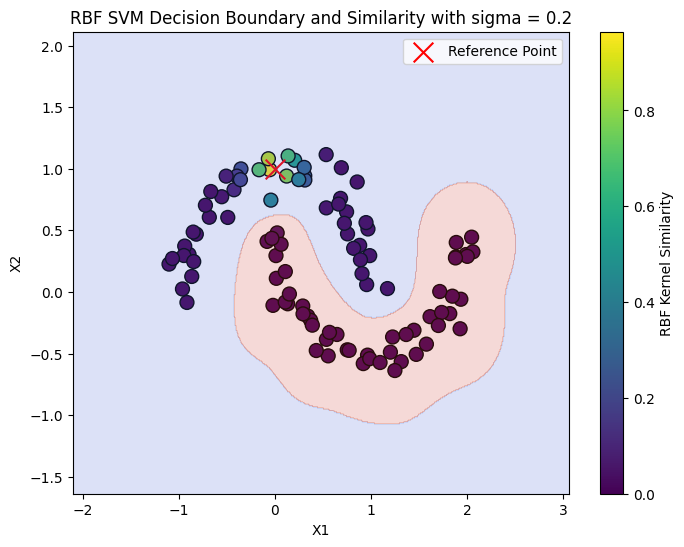

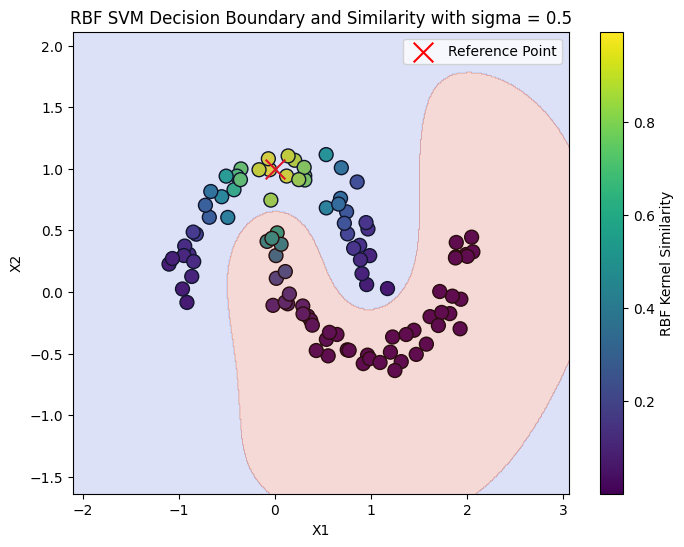

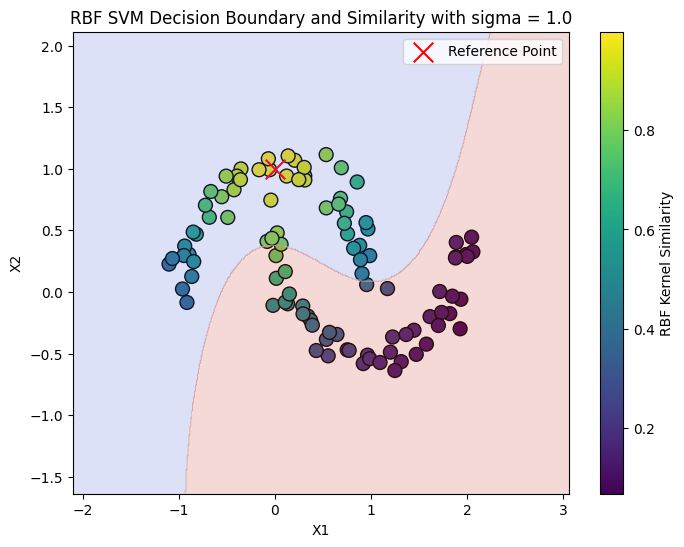

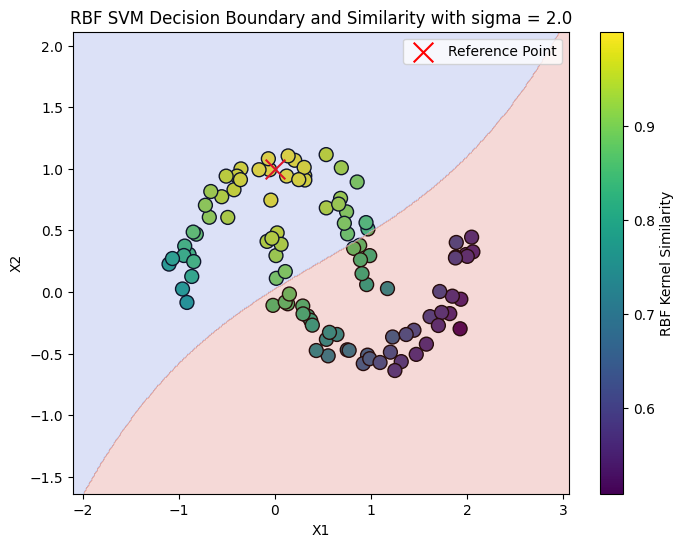

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

np.random.seed(0)
data, labels = make_moons(n_samples=100, noise=0.1)

ref_point = np.array([[0, 1]])

def plot_rbf_svm_decision_boundary(data, labels, ref_point, sigma):
    gamma = 1 / (2 * sigma ** 2)
    rbf_svc = SVC(kernel='rbf', C=1.0, gamma=gamma)
    rbf_svc.fit(data, labels)
    similarities = rbf_kernel(data, ref_point, gamma=gamma).flatten()
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=similarities, cmap='viridis', s=100, edgecolor='k')
    plt.colorbar(scatter, label="RBF Kernel Similarity")
    plt.scatter(ref_point[0][0], ref_point[0][1], color="red", marker="x", s=200, label="Reference Point")
    
    # Plot decision boundary
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    
    plt.title(f'RBF SVM Decision Boundary and Similarity with sigma = {sigma}')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

# Plot RBF similarity and decision boundary for different sigma values
for sigma in [0.2, 0.5, 1.0, 2.0]: 
    plot_rbf_svm_decision_boundary(data, labels, ref_point, sigma)
